# Phase 2 - Week 1 - Day 1 PM - Artificial Neural Network (ANN) - Binary Classification

> **NOTES**

> Before you run the notebook below, **it is recommended to run the program using the GPU** so that the training process doesn't take too long.
> If you use Google Colab, then you can set it by following the steps: `Runtime` >> `Change runtime type` >> `T4 GPU`.

# A. Binary Classification

## A.1 - Import Libraries & Data Loading

In the first tutorial, we will implement Binary Classification using Titanic dataset to build neural network models.

The purpose of this notebook is to demonstrate the creation of an ANN model in a general sense, so some details such as EDA, handling outliers, checking types of missing values, etc., are omitted.

In reality, you should consider these aspects for the project you are working on so that your ANN model is an optimal model.

In [34]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

In [35]:
# Load the Titanic dataset

url = 'https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D3AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## A.2 - Feature Engineering

### A.2.1 - Data Splitting

In [36]:
# Splitting between `X` and `y`

X = data.drop('Survived', axis=1)
y = data['Survived']

In [37]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (643, 11)
Val Size   :  (114, 11)
Test Size  :  (134, 11)


### A.2.2 - Handling Missing Values

In [38]:
# Check Missing Values on X_train

X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            131
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          497
Embarked         2
dtype: int64

In [39]:
# Check Missing Values on X_val

X_val.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            22
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          94
Embarked        0
dtype: int64

In [40]:
# Check Missing Values on X_test

X_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            24
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          96
Embarked        0
dtype: int64

We will impute this missing values in Pipeline using median imputation.

### A.2.3 - Feature Selection

Let's assume columns `PassengerId`, `Cabin`, `Ticket`, `Embarked`, and `Name` do not have strong correlations against the target (column `Survived`).

In [41]:
# Drop Columns

X_train.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_val.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Cabin', 'Ticket', 'Embarked', 'Name'], axis=1, inplace=True)

X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
868,3,male,NaN,0,0,9.5000
223,3,male,NaN,0,0,7.8958
846,3,male,NaN,8,2,69.5500
171,3,male,4.0,4,1,29.1250
435,1,female,14.0,1,2,120.0000
...,...,...,...,...,...,...
533,3,female,NaN,0,2,22.3583
302,3,male,19.0,0,0,0.0000
473,2,female,23.0,0,0,13.7917
283,3,male,19.0,0,0,8.0500


### A.2.4 - Pipeline

In [42]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns :  ['Sex']


In [43]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [44]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(643, 7)

#### A.4.1 - Model Definition  

In [45]:
# Create ANN Model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.initializers import RandomNormal, HeNormal
from tensorflow.keras.layers import Input, Dense


seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = HeNormal(seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_relu = Sequential([
    Input(shape=(7,), name='input-layer'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(5, activation='relu', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile
model_relu.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
model_relu.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 5)                 40        
                                                                 
 hidden-layer-2 (Dense)      (None, 5)                 30        
                                                                 
 hidden-layer-3 (Dense)      (None, 5)                 30        
                                                                 
 output-layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 106 (424.00 Byte)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# Train the ANN Model

history_1 = model_relu.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


21/21 [==============================] - 3s 16ms/step - loss: 0.7532 - accuracy: 0.6314 - val_loss: 0.7035 - val_accuracy: 0.6579
Epoch 2/30
21/21 [==============================] - 0s 7ms/step - loss: 0.6956 - accuracy: 0.6532 - val_loss: 0.6706 - val_accuracy: 0.6491
Epoch 3/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.6719 - val_loss: 0.6607 - val_accuracy: 0.6667
Epoch 4/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6843 - val_loss: 0.6527 - val_accuracy: 0.6667
Epoch 5/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6491 - accuracy: 0.6890 - val_loss: 0.6455 - val_accuracy: 0.6667
Epoch 6/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6408 - accuracy: 0.6921 - val_loss: 0.6385 - val_accuracy: 0.6667
Epoch 7/30
21/21 [==============================] - 0s 6ms/step - loss: 0.6308 - accuracy: 0.6843 - val_loss: 0.6314 - val_accuracy: 0.6667
Epoch 8/30
21/21 [============

In [47]:
# Predict test-set

result_model_relu = model_relu.evaluate(X_test, y_test)
print('test loss', result_model_relu[0])
print('test acc', result_model_relu[1])

5/5 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8060
test loss 0.45102447271347046
test acc 0.8059701323509216


In [48]:
train_result_model_relu = model_relu.evaluate(X_train, y_train)
print('train loss', train_result_model_relu[0])
print('train acc', train_result_model_relu[1])

21/21 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.8056
train loss 0.45643821358680725
train acc 0.8055987358093262


## A. ANN Model - RELU

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

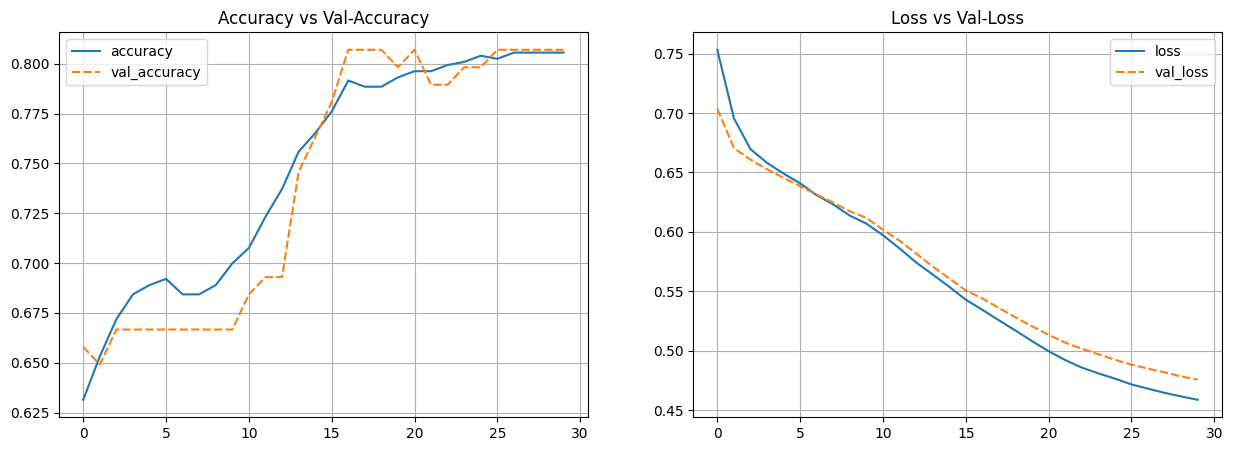

In [50]:
# Plot Training Results

history_model_1 = pd.DataFrame(history_1.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [54]:
history_2 = model_relu.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
21/21 [==============================] - 0s 11ms/step - loss: 0.4567 - accuracy: 0.8087 - val_loss: 0.4733 - val_accuracy: 0.8158
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.7963 - val_loss: 0.4759 - val_accuracy: 0.7982
Epoch 3/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4530 - accuracy: 0.7978 - val_loss: 0.4716 - val_accuracy: 0.8070
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4505 - accuracy: 0.7994 - val_loss: 0.4676 - val_accuracy: 0.8070
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4489 - accuracy: 0.8072 - val_loss: 0.4655 - val_accuracy: 0.7982
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4474 - accuracy: 0.8025 - val_loss: 0.4660 - val_accuracy: 0.8070
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4445 - accuracy: 0.8072 - val_loss: 0.4618 - val_accuracy: 0.8070
Epoch 8/100


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

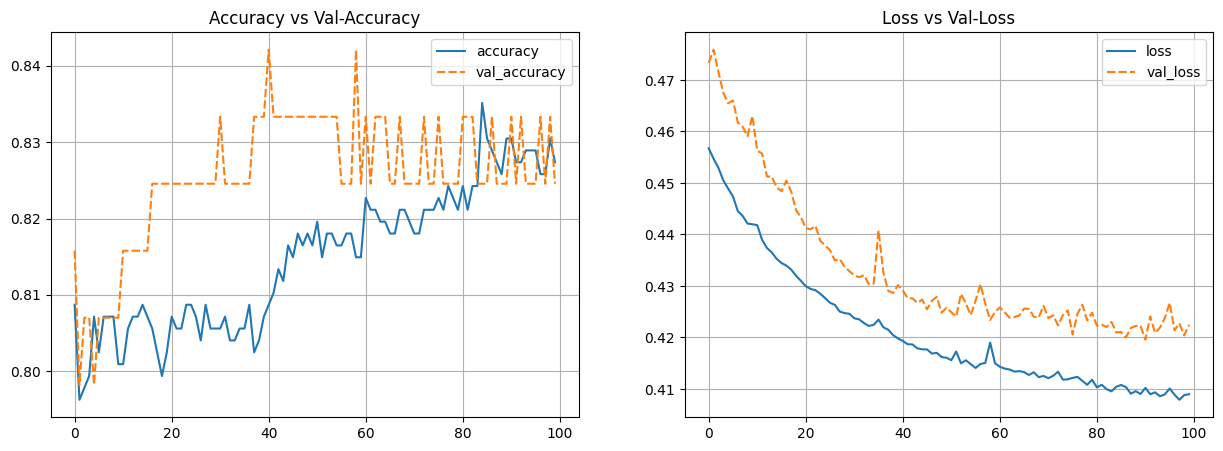

In [55]:
# Plot Training Results

history_model_2 = pd.DataFrame(history_2.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_2[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_2[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

## B. ANN Model - Sigmoid

In [51]:
# Create ANN Model

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

initializer = RandomNormal(mean=0, stddev=1, seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model_sigmoid = Sequential([
    Input(shape=(7,), name='input-layer'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-1'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-2'),
    Dense(5, activation='sigmoid', kernel_initializer=initializer, name='hidden-layer-3'),
    Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
])

# Compile
model_sigmoid.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])
model_sigmoid.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-layer-1 (Dense)      (None, 5)                 40        
                                                                 
 hidden-layer-2 (Dense)      (None, 5)                 30        
                                                                 
 hidden-layer-3 (Dense)      (None, 5)                 30        
                                                                 
 output-layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 106 (424.00 Byte)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# Predict test-set

result_model_sigmoid = model_sigmoid.evaluate(X_test, y_test)
print('test loss', result_model_sigmoid[0])
print('test acc', result_model_sigmoid[1])

5/5 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5821
test loss 0.6843878030776978
test acc 0.5820895433425903


In [53]:
train_result_model_sigmoid = model_sigmoid.evaluate(X_train, y_train)
print('train loss', train_result_model_sigmoid[0])
print('train acc', train_result_model_sigmoid[1])

21/21 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.6252
train loss 0.6737385392189026
train acc 0.6251944303512573


## Model - ELU - Functional API

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
callbacks_1= [
    EarlyStopping(monitor='val_loss', patience= 3, restore_best_weights=True)
]

In [77]:
# clear session

import tensorflow as tf
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
# # Create ANN Model

# seed = 20
# tf.keras.backend.clear_session()
# np.random.seed(seed)
# tf.random.set_seed(seed)



# model_elu = Sequential([
#     Input(shape=(7,), name='input-layer'),
#     Dense(5, activation='elu', kernel_initializer=initializer, name='hidden-layer-1'),
#     Dense(5, activation='elu', kernel_initializer=initializer, name='hidden-layer-2'),
#     Dense(5, activation='elu', kernel_initializer=initializer, name='hidden-layer-3'),
#     Dense(1, activation="sigmoid", kernel_initializer=initializer, name='output-layer')
# ])

# # Compile
# model_elu.compile(loss=loss_function,
#               optimizer=optimizer,
#               metrics=['accuracy'])
# model_elu.summary()

# history_3= model_elu.fit(X_train, y_train,
#                           epochs=200,
#                           batch_size=32,
#                           callbacks= callbacks_1,
#                           validation_data=(X_val, y_val))

In [ ]:
# # create functional model

# from tensorflow.keras.layers import Input, concatenate
# from tensorflow.keras import Model

# initializer = HeNormal(seed=seed)
# loss_function = tf.keras.losses.BinaryCrossentropy()
# optimizer = tf.keras.optimizers.Adam()

# input_layer = Input(shape=(7,))
# hidden_layer_1 = Dense(5, activation='elu', kernel_initializer=initializer(seed))(input_layer)
# hidden_layer_2 = Dense(5, activation='elu', kernel_initializer=initializer(seed))(hidden_layer_1)
# hidden_layer_3 = Dense(5, activation='elu', kernel_initializer=initializer(seed))(hidden_layer_2)

# concat_layer = concatenate([input_layer, hidden_layer_3])
# output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

# model_func = Model(inputs=input_layer, outputs=output_layer)

# # compile model
# model_func.compile(loss='binary_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])
# model_func.summary()

In [90]:
# create functional model
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.initializers import HeNormal
from keras.layers import Concatenate, Input,BatchNormalization

seed = 1
initializer = HeNormal(seed=seed)
loss_function = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam()

input_layer = Input(shape=(7,))
hidden_layer_1 = Dense(8, activation='elu', kernel_initializer=initializer)(input_layer)

# batch normalization
Batch_Normal = BatchNormalization()(hidden_layer_1)

hidden_layer_2 = Dense(16, activation='elu', kernel_initializer=initializer)(Batch_Normal)

#dropout
Dropout = tf.keras.layers.Dropout(0.2)(hidden_layer_2)

hidden_layer_3 = Dense(24, activation='elu', kernel_initializer=initializer)(Dropout)

concat_layer = concatenate([input_layer, hidden_layer_3])
output_layer = Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotNormal(seed))(concat_layer)

model_func = Model(inputs=input_layer, outputs=output_layer)

# compile model
model_func.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model_func.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 7)]                  0         []                            
                                                                                                  
 dense_18 (Dense)            (None, 8)                    64        ['input_7[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 8)                    32        ['dense_18[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 dense_19 (Dense)            (None, 16)                   144       ['batch_normalization_3[

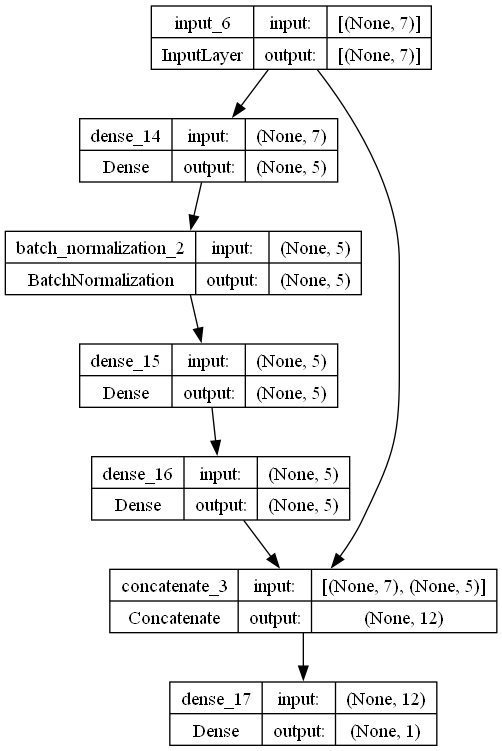

In [87]:
# plot model
tf.keras.utils.plot_model(model_func, show_shapes=True)

In [91]:
history_3= model_func.fit(X_train, y_train,
                          epochs=200,
                          batch_size=32,
                          callbacks= callbacks_1,
                          validation_data=(X_val, y_val))

Epoch 1/200
21/21 [==============================] - 2s 20ms/step - loss: 0.9284 - accuracy: 0.4152 - val_loss: 0.7802 - val_accuracy: 0.4649
Epoch 2/200
21/21 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.6625 - val_loss: 0.6424 - val_accuracy: 0.7105
Epoch 3/200
21/21 [==============================] - 0s 5ms/step - loss: 0.5779 - accuracy: 0.7341 - val_loss: 0.5683 - val_accuracy: 0.7368
Epoch 4/200
21/21 [==============================] - 0s 6ms/step - loss: 0.5455 - accuracy: 0.7621 - val_loss: 0.5147 - val_accuracy: 0.7719
Epoch 5/200
21/21 [==============================] - 0s 8ms/step - loss: 0.5098 - accuracy: 0.7776 - val_loss: 0.4900 - val_accuracy: 0.8070
Epoch 6/200
21/21 [==============================] - 0s 7ms/step - loss: 0.4974 - accuracy: 0.7885 - val_loss: 0.4683 - val_accuracy: 0.8070
Epoch 7/200
21/21 [==============================] - 0s 6ms/step - loss: 0.4857 - accuracy: 0.7994 - val_loss: 0.4558 - val_accuracy: 0.8070
Epoch 8/200


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf

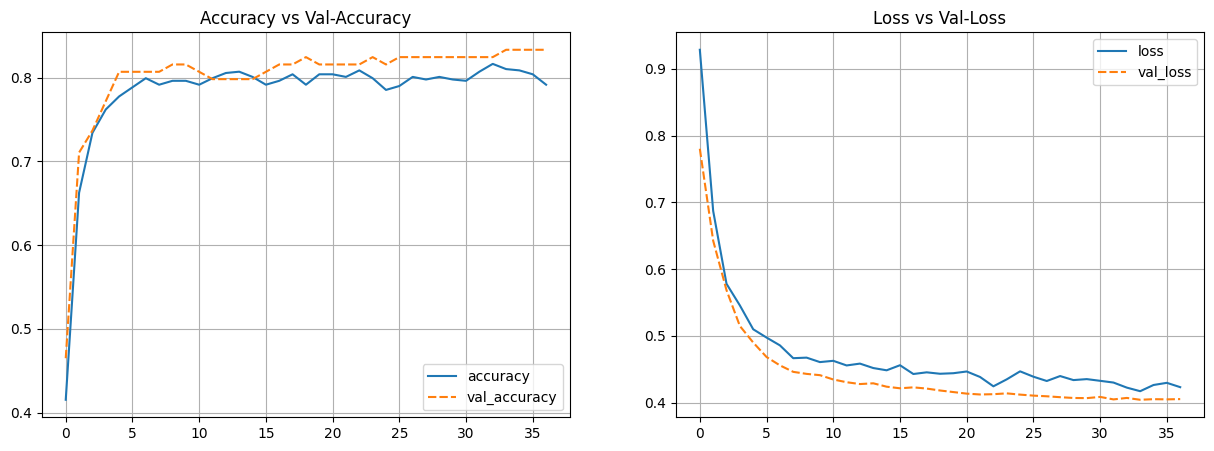

In [92]:
# Plot Training Results

history_seq3 = pd.DataFrame(history_3.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_seq3[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_seq3[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

In [93]:
# Predict test-set

result_model_elu = model_func.evaluate(X_test, y_test)
print('test loss',result_model_elu[0])
print('test acc',result_model_elu[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8134
test loss 0.43119463324546814
test acc 0.8134328126907349
